# Aplicando Python para análisis de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

# 1. Descarga, manejo y análisis de datos
Para esto utilizaremos el paquete *yfinance*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *yfinance*. Por lo que será necesario instalarlo aparte:

- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: `conda install yfinance`;
- alternativa: `conda install -c conda-forge yfinance`

otra forma, desde el notebook
- `!pip install yfinance -y`

- una vez finalice la instalación correr el comando: `conda list`, y buscar que sí se haya instalado yfinance


In [5]:
#!conda list

In [6]:
#%pip install yfinance

```python
import sys

sys.path.append('C:...')
```

In [7]:
import yfinance as yf
import pandas as pd

Primero importaremos datos desde un archivo con extensión `.csv`

In [8]:
datos=pd.read_csv('META.csv')
datos.head() # Muestra las primeras 5 filas

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600
1,2017-06-02,151.850006,153.630005,151.300003,153.610001,153.610001,16854400
2,2017-06-05,153.639999,154.710007,153.410004,153.630005,153.630005,12520400
3,2017-06-06,153.410004,154.520004,152.479996,152.809998,152.809998,13457100
4,2017-06-07,153.270004,153.750000,152.339996,153.119995,153.119995,12066700


In [9]:
datos.tail(10) # Muestra las últimas 10 filas

,Date,Open,High,Low,Close,Adj Close,Volume
1261,2022-06-03,195.979996,196.610001,189.779999,190.779999,190.779999,19447300
1262,2022-06-06,193.990005,196.919998,188.399994,194.250000,194.250000,30574200
1263,2022-06-07,191.929993,196.529999,191.490005,195.649994,195.649994,18828700
1264,2022-06-08,194.669998,202.029999,194.410004,196.639999,196.639999,22267200
1265,2022-06-09,194.279999,199.449997,183.679993,184.000000,184.000000,23501600
1266,2022-06-10,183.039993,183.100006,175.020004,175.570007,175.570007,27450800
1267,2022-06-13,170.589996,172.580002,164.029999,164.259995,164.259995,31749300
1268,2022-06-14,166.029999,166.750000,161.360001,163.729996,163.729996,27244300
1269,2022-06-15,167.199997,172.160004,163.979996,169.350006,169.350006,30008300
1270,2022-06-16,163.720001,165.080002,159.610001,160.869995,160.869995,26944100


In [10]:
# Leemos de nuevo para nombrar 'Date' como index
datos=pd.read_csv('META.csv',index_col='Date')
datos.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600
2017-06-02,151.850006,153.630005,151.300003,153.610001,153.610001,16854400


In [11]:
# Para conocer el precio en una fecha específica
datos.loc['2017-06-02','Adj Close']              # ['fila','columna']

153.610001

In [12]:
# Ahora todos los precios
datos.loc['2017-06-02']

Open         1.518500e+02
High         1.536300e+02
Low          1.513000e+02
Close        1.536100e+02
Adj Close    1.536100e+02
Volume       1.685440e+07
Name: 2017-06-02, dtype: float64

In [13]:
# Buscamos el tercer valor
# datos.loc['2017-06-03'] # No existe la fecha

datos.iloc[2] # La tercer fecha es la posición 2  ( 0,1,2 )

Open         1.536400e+02
High         1.547100e+02
Low          1.534100e+02
Close        1.536300e+02
Adj Close    1.536300e+02
Volume       1.252040e+07
Name: 2017-06-05, dtype: float64

<Axes: xlabel='Date'>

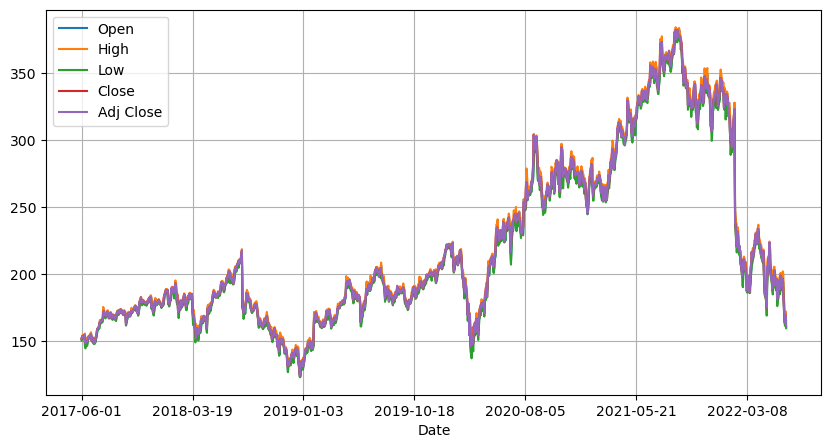

In [14]:
datos.iloc[:,:-1].plot(grid=True,figsize=(10,5))

<Axes: xlabel='Date'>

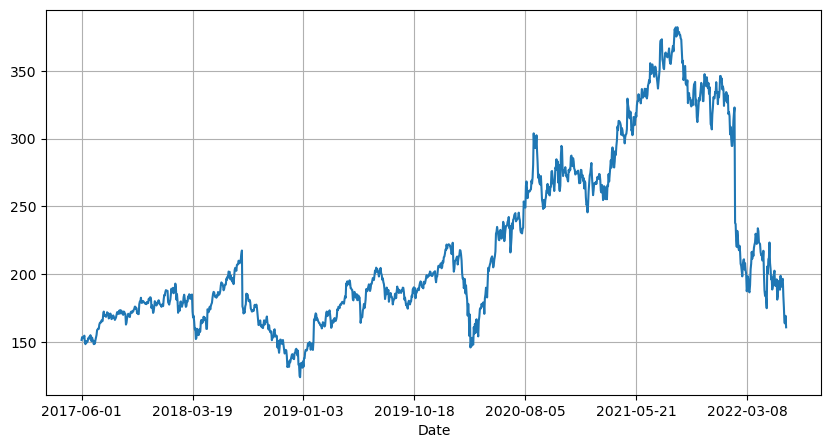

In [15]:
datos['Adj Close'].plot(grid=True,figsize=(10,5))

In [16]:
# Resumen estadístico
datos.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1.271000e+03
mean,220.325271,223.155838,217.499205,220.366680,220.366680,2.191758e+07
std,63.422716,64.165274,62.723751,63.438394,63.438394,1.429516e+07
min,123.099998,129.740005,123.019997,124.059998,124.059998,6.046300e+06
25%,174.459999,176.000000,172.049996,174.090004,174.090004,1.374605e+07
50%,194.380005,197.070007,191.570007,194.110001,194.110001,1.815240e+07
75%,267.150010,270.159988,263.515000,266.619995,266.619995,2.504500e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,1.881199e+08


In [17]:
# Media de 'Adj Close'
datos['Adj Close'].mean()

220.36667979150275

In [18]:
# Desviación estandar de todos los precios
datos.std()

Open         6.342272e+01
High         6.416527e+01
Low          6.272375e+01
Close        6.343839e+01
Adj Close    6.343839e+01
Volume       1.429516e+07
dtype: float64

Ahora lo haremos desde Yahoo Finance

In [19]:
#yf.download?

In [20]:
names=['META','^GSPC','TSLA'] # Meta, S&P, Tesla
start='2017-06-01'
end='2023-06-20'

datos=yf.download(names,start,end)['Adj Close']
datos.head()

[*********************100%***********************]  3 of 3 completed


,META,TSLA,^GSPC
Date,,,
2017-06-01,151.529999,22.691334,2430.060059
2017-06-02,153.610001,22.656668,2439.070068
2017-06-05,153.630005,23.154667,2436.100098
2017-06-06,152.809998,23.523333,2429.330078
2017-06-07,153.119995,23.976667,2433.139893


¿Cómo lucen estos datos?

<Axes: xlabel='Date'>

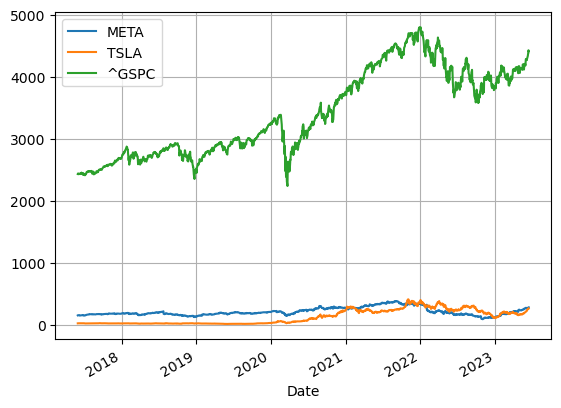

In [21]:
datos.plot(grid=True)

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

## 1.2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [22]:
# META=datos[['Adj Close']]
# META.head()

In [23]:
# META.shift().head() # .shift()  ->  recorre los valores una casilla

In [24]:
R=((datos-datos.shift())/datos.shift()).dropna() # dropna()  ->  elimina las filas con NaN
R.head()

,META,TSLA,^GSPC
Date,,,
2017-06-02,0.013727,-0.001528,0.003708
2017-06-05,0.000130,0.021980,-0.001218
2017-06-06,-0.005338,0.015922,-0.002779
2017-06-07,0.002029,0.019272,0.001568
2017-06-08,0.010384,0.028778,0.000267


y la gráfica de los rendimientos se puede obtener como...

array([[<Axes: title={'center': 'META'}>,
        <Axes: title={'center': 'TSLA'}>],
       [<Axes: title={'center': '^GSPC'}>, <Axes: >]], dtype=object)

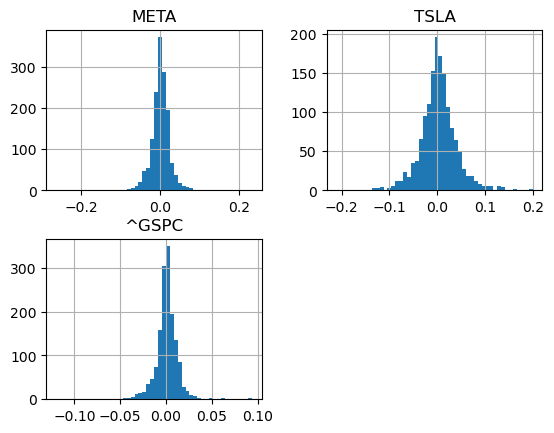

In [25]:
# Histograma
R.hist(bins=50)

In [26]:
# Media y std
R.mean(),R.std()

(META     0.000766
 TSLA     0.002386
 ^GSPC    0.000475
 dtype: float64,
 META     0.026548
 TSLA     0.039566
 ^GSPC    0.012848
 dtype: float64)

<Axes: xlabel='Date'>

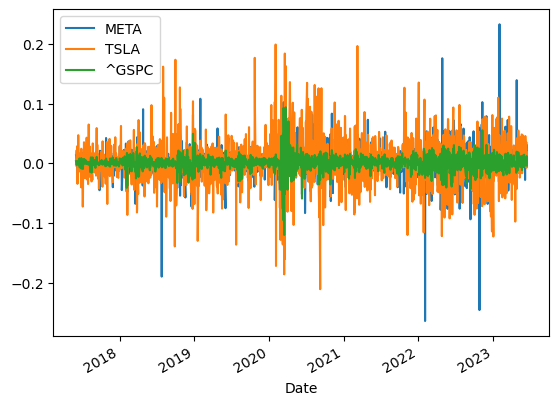

In [27]:
R.plot()

Donde se observa que el rendimiento **tiene una tendencia constante** y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [28]:
import numpy as np

In [29]:
r=np.log(datos/datos.shift()).dropna()
r.head()

,META,TSLA,^GSPC
Date,,,
2017-06-02,0.013633,-0.001529,0.003701
2017-06-05,0.000130,0.021742,-0.001218
2017-06-06,-0.005352,0.015796,-0.002783
2017-06-07,0.002027,0.019088,0.001567
2017-06-08,0.010331,0.028372,0.000267


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

array([[<Axes: title={'center': 'META'}>,
        <Axes: title={'center': 'TSLA'}>],
       [<Axes: title={'center': '^GSPC'}>, <Axes: >]], dtype=object)

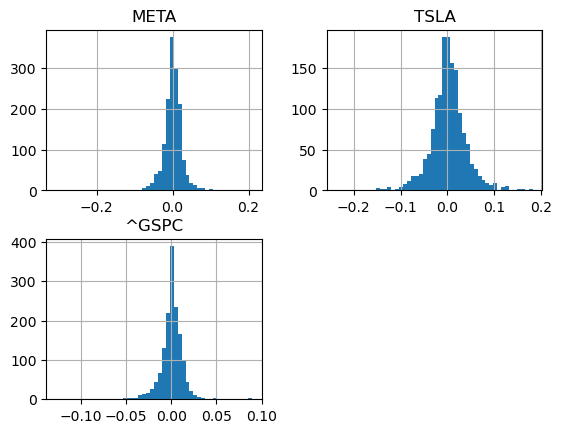

In [30]:
r.hist(bins=50)

In [31]:
r.mean(),r.std()

(META     0.000406
 TSLA     0.001605
 ^GSPC    0.000392
 dtype: float64,
 META     0.026991
 TSLA     0.039514
 ^GSPC    0.012901
 dtype: float64)

In [32]:
#datos.pct_change?

In [33]:
R=datos.pct_change().dropna() # (datos-datos.shift())/datos.shift()
R.head()

,META,TSLA,^GSPC
Date,,,
2017-06-02,0.013727,-0.001528,0.003708
2017-06-05,0.000130,0.021980,-0.001218
2017-06-06,-0.005338,0.015922,-0.002779
2017-06-07,0.002029,0.019272,0.001568
2017-06-08,0.010384,0.028778,0.000267


___
# 2. Simulación de escenarios futuros de precios

Entonces, suponemos que el cambio porcentual de los precios (rendimientos diarios) tiene una distribución normal.

¿Cómo se caracteriza una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)?

In [34]:
import matplotlib.pyplot as plt

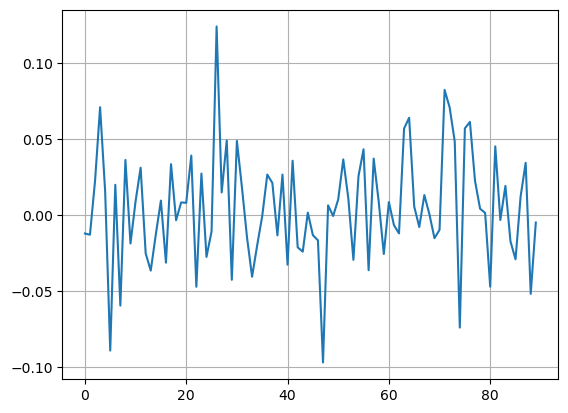

In [35]:
# Simulamos un posible escenario para... Tesla
me=R['TSLA'].mean()
std=R['TSLA'].std()
dias=90
E=np.random.normal(me,std,dias)

plt.plot(E)
plt.grid()

In [36]:
#pd.date_range?

In [37]:
fechas=pd.date_range('2023-06-21','2023-06-30')
fechas

DatetimeIndex(['2023-06-21', '2023-06-22', '2023-06-23', '2023-06-24',
               '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30'],
              dtype='datetime64[ns]', freq='D')

In [38]:
len(fechas)

10

In [39]:
pd.date_range('2023-06-21',periods=10)

DatetimeIndex(['2023-06-21', '2023-06-22', '2023-06-23', '2023-06-24',
               '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30'],
              dtype='datetime64[ns]', freq='D')

Habiendo caracterizado los rendimientos diarios como una variable aleatoria normal con la media y la varianza muestral obtenida de los datos del 2018, podemos generar números aleatorios con estas características para simular el comportamiento de los precios de cierre de las acciones en el 2019 (hay un supuesto de que las cosas no cambiarán fundamentalmente).

Sin embargo, cada simulación que hagamos nos conducirá a distintos resultados (los precios siguen evolucionando aleatoriamente). Entonces, lo que haremos es simular varios escenarios para así ver alguna tendencia y tomar decisiones.

Hagamos una una función que simule varios escenarios de rendimientos diarios y que devuelva un dataframe con esta simulación.

In [40]:
import numpy as np
import pandas as pd

In [41]:
def simulador(me,std,start,end,N):
    fechas=pd.date_range(start,end)
    dias=len(fechas)
    datos=np.random.normal(me,std,(dias,N))
    return pd.DataFrame(data=datos,index=fechas)

In [63]:
R_TSLA=simulador(R['TSLA'].mean(),R['TSLA'].std(),'2023-06-21','2023-09-21',10**5)
R_TSLA.head(2)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2023-06-21,0.046718,-0.054123,-0.013243,0.022249,-0.021585,-0.045165,-0.038319,-0.030273,0.011481,0.000227,...,0.075840,0.033472,-0.043864,0.038399,0.05030,0.011160,0.011367,-0.004009,-0.062109,0.030166
2023-06-22,-0.005118,0.032956,0.035349,0.013699,0.028046,-0.005434,0.043225,0.006576,-0.060812,-0.028221,...,0.026322,-0.079618,0.058156,0.021309,-0.02391,0.007608,-0.020306,0.031942,0.045747,0.030461


In [64]:
R_SP=simulador(R['^GSPC'].mean(),R['^GSPC'].std(),'2023-06-21','2023-09-21',10**5)
R_META=simulador(R['META'].mean(),R['META'].std(),'2023-06-21','2023-09-21',10**5)

## 2.2 Proyección de precios

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$, donde $p_{-1}$ es el último precio reportado en el actual año.

In [44]:
datos.iloc[-1]

META      281.000000
TSLA      260.540009
^GSPC    4409.589844
Name: 2023-06-16 00:00:00, dtype: float64

In [45]:
R_TSLA.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-06-21,-0.047540,-0.006548,0.030114,0.053040,0.026493,-0.026099,0.034642,-0.023794,0.038797,-0.003947,...,0.007382,0.085302,0.022289,0.012248,-0.019119,0.064385,-0.081852,0.039424,-0.006767,0.068841
2023-06-22,0.011175,0.052702,0.030240,0.020672,0.071759,0.010493,-0.001003,-0.010432,-0.036251,-0.012504,...,0.002030,0.031126,-0.020385,0.056394,-0.055984,0.066387,-0.029996,-0.034949,-0.048480,0.054883
2023-06-23,-0.014627,0.061078,-0.015312,0.002761,-0.049656,0.037487,0.020977,-0.040493,-0.068411,0.034905,...,0.015341,0.055966,-0.030483,0.000651,-0.051212,-0.023242,-0.052758,0.026713,-0.006326,0.008454
2023-06-24,0.006645,0.054101,0.065790,-0.026532,-0.045321,0.019117,-0.004387,0.024793,0.016352,-0.066129,...,0.011829,0.055677,-0.000655,0.030702,0.033964,-0.052860,-0.062308,-0.008327,-0.046940,0.084023
2023-06-25,0.003327,0.072987,-0.003505,-0.054758,0.067645,-0.029134,-0.016397,0.032497,-0.000708,0.031119,...,-0.047246,0.009130,0.022680,-0.024047,0.054349,0.008516,0.015368,0.045652,-0.013463,-0.107156


In [46]:
# Multiplicación sucesiva
(R_TSLA+1).cumprod()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-06-21,0.952460,0.993452,1.030114,1.053040,1.026493,0.973901,1.034642,0.976206,1.038797,0.996053,...,1.007382,1.085302,1.022289,1.012248,0.980881,1.064385,0.918148,1.039424,0.993233,1.068841
2023-06-22,0.963103,1.045809,1.061264,1.074809,1.100153,0.984120,1.033604,0.966022,1.001140,0.983598,...,1.009427,1.119084,1.001450,1.069333,0.925967,1.135047,0.890607,1.003097,0.945081,1.127502
2023-06-23,0.949016,1.109686,1.045014,1.077777,1.045523,1.021012,1.055286,0.926905,0.932650,1.017931,...,1.024913,1.181715,0.970922,1.070028,0.878547,1.108666,0.843620,1.029893,0.939103,1.137034
2023-06-24,0.955323,1.169721,1.113765,1.049181,0.998140,1.040530,1.050657,0.949886,0.947900,0.950616,...,1.037036,1.247508,0.970286,1.102880,0.908385,1.050062,0.791056,1.021317,0.895021,1.232571
2023-06-25,0.958501,1.255096,1.109862,0.991731,1.065659,1.010215,1.033428,0.980755,0.947229,0.980198,...,0.988041,1.258898,0.992291,1.076360,0.957755,1.059005,0.803213,1.067942,0.882972,1.100493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-17,0.969081,2.111584,0.645303,1.825053,0.650547,1.104857,1.492064,0.833497,1.170558,1.474700,...,0.651970,1.500431,0.358072,1.398827,1.506513,1.224801,1.196638,1.406927,1.032852,1.695149
2023-09-18,1.002582,1.980324,0.633582,1.844166,0.640576,1.037093,1.492663,0.797939,1.136267,1.479123,...,0.647200,1.517439,0.354318,1.337376,1.514155,1.227796,1.213387,1.438251,1.019330,1.695000
2023-09-19,1.028711,2.050401,0.665521,1.911360,0.647866,1.049712,1.452063,0.822968,1.183009,1.383027,...,0.639637,1.551241,0.319752,1.225935,1.540453,1.263176,1.196627,1.479403,1.038209,1.739489
2023-09-20,1.033234,2.017527,0.680792,1.949135,0.593140,1.058989,1.558955,0.804352,1.311136,1.447386,...,0.632869,1.570763,0.327159,1.281085,1.560686,1.275190,1.197183,1.460379,1.004456,1.742355


In [65]:
P_TSLA=datos['TSLA'].iloc[-1]*(R_TSLA+1).cumprod()
P_TSLA.head()

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2023-06-21,272.711871,246.438859,257.089622,266.336834,254.916196,248.772686,250.556308,252.652699,263.531249,260.599149,...,280.299261,269.260811,249.111749,270.544474,273.645160,263.447619,263.501549,259.495401,244.358174,268.399396
2023-06-22,271.316250,254.560394,266.177434,269.985252,262.065641,247.420977,261.386551,254.314263,247.505314,253.244805,...,287.677222,247.822892,263.598999,276.309561,267.102196,265.451872,258.150912,267.784149,255.536856,276.575073
2023-06-23,280.323389,266.410373,248.645198,263.392723,259.467793,252.828597,267.296622,254.811526,236.695924,242.892540,...,298.275499,238.205858,257.631364,283.405760,255.061026,265.344646,255.540042,252.458964,262.838862,288.128245
2023-06-24,283.014527,263.259696,258.634479,262.371104,278.870873,241.567288,271.526085,255.858184,244.521378,244.212605,...,285.676001,235.439498,239.963487,278.240513,273.218935,270.540907,267.146115,254.409104,260.761322,277.351052
2023-06-25,292.554106,255.427769,251.396551,268.158124,269.238892,258.142033,278.130363,261.758568,247.752335,238.437553,...,274.973345,244.752476,235.012194,287.978426,265.989232,270.327406,256.619072,262.881318,265.718014,270.256076


In [66]:
P_META=datos['META'].iloc[-1]*(R_META+1).cumprod()
P_SP=datos['^GSPC'].iloc[-1]*(R_SP+1).cumprod()

## 2.3 Probabilidad Precio-Umbral

Ya que tenemos muchos escenarios de precios proyectados, podemos ver varias cosas. Por ejemplo, ¿cuál es la probabilidad de que el precio de cierre sobrepase algún valor umbral en algún momento?

In [49]:
# Umbral a superar
U=datos.iloc[-1]*1.1
U

META      309.100000
TSLA      286.594009
^GSPC    4850.548828
Name: 2023-06-16 00:00:00, dtype: float64

In [67]:
# Variables de Bernoulli
B_TSLA=P_TSLA>U['TSLA']
B_META=P_META>U['META']
B_SP=P_SP>U['^GSPC']

B_TSLA.head(3)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2023-06-21,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-06-22,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2023-06-23,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


<Axes: >

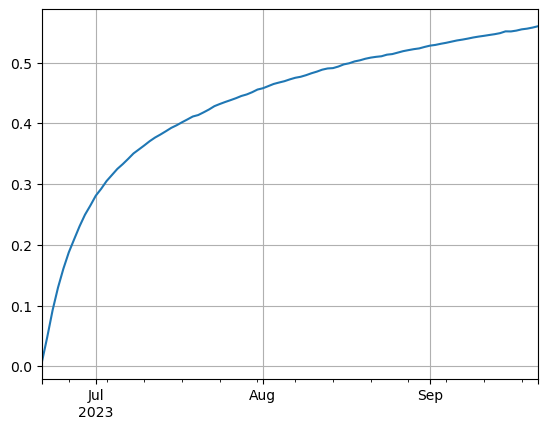

In [68]:
M_TSLA=B_TSLA.mean(axis=1)
M_TSLA.plot(grid=True)

<Axes: >

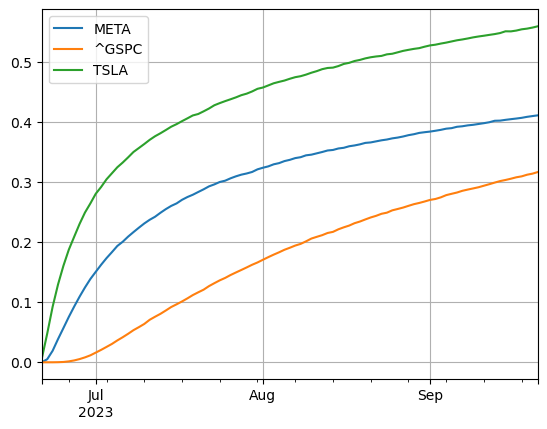

In [69]:
M_META=B_META.mean(axis=1)
M_SP=B_SP.mean(axis=1)

M_META.plot(label='META',legend=1)
M_SP.plot(label='^GSPC',legend=1)
M_TSLA.plot(grid=True,label='TSLA',legend=1)

In [58]:
R.mean(),R.std()

(META     0.000766
 TSLA     0.002386
 ^GSPC    0.000475
 dtype: float64,
 META     0.026548
 TSLA     0.039566
 ^GSPC    0.012848
 dtype: float64)

___
Entonces, ya aprendimos a bajar datos con pandas-datareader. En específico, a partir de los precios de cierre ajustados obtuvimos los rendimientos diarios.

Suponiendo que los rendimientos diarios son un proceso estocástico estacionario de distribución normal, pudimos caracaterizarlo y proyectar varios escenarios de evolución de los precios (Montecarlo).

Con estas proyecciones pudimos calcular probabilidades de sobrepasar cierto precio umbral: toma de decisiones.